## ASSIGNMENT 2 ##

In [1]:
#1. Load library & dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import entropy

In [2]:
data_price_demand = pd.read_csv('price_and_demand.csv', header=None)
data_weather = pd.read_csv('weather.csv', encoding= 'unicode_escape')

## 1. DATA CLEANING ##

### Clean the price_and_demand dataset ###

In [3]:
display(data_price_demand.head())

,0,1,2,3,4
0,VIC1,1/11/2022 0:30,"4,178.18",8.94,TRADE
1,VIC1,1/11/2022 1:00,"4,086.02",0.14,TRADE
2,VIC1,1/11/2022 1:30,"4,033.37",0.02,TRADE
3,VIC1,1/11/2022 2:00,"3,985.64",0.00,TRADE
4,VIC1,1/11/2022 2:30,"3,885.64",0.02,TRADE


In [4]:
# Add header name to the dataframe:
header_names = ['State', 'Date_Time', 'Demand (MW)', 'Price', 'Trade_Status']
data_price_demand.columns = header_names

In [5]:
# Check for missing value
print(data_price_demand.isnull().sum())

State           0
Date_Time       0
Demand (MW)     0
Price           0
Trade_Status    0
dtype: int64


In [6]:
# Unique values in each columns:
for column in data_price_demand.columns:
    unique_values = data_price_demand[column].unique()
    print(f"'{column}': {unique_values}")

'State': ['VIC1']
'Date_Time': ['1/11/2022 0:30' '1/11/2022 1:00' '1/11/2022 1:30' ... '23/04/2023 23:00'
 '23/04/2023 23:30' '24/04/2023 0:00']
'Demand (MW)': ['4,178.18' '4,086.02' '4,033.37' ... '4,472.49' '4,621.36' '4,395.96']
'Price': [8.940e+00 1.400e-01 2.000e-02 ... 8.125e+01 9.397e+01 8.396e+01]
'Trade_Status': ['TRADE']


In [7]:
print(data_price_demand.dtypes)

State            object
Date_Time        object
Demand (MW)      object
Price           float64
Trade_Status     object
dtype: object


In [8]:
# Convert the date column to a datetime data type
data_price_demand['Date_Time'] = pd.to_datetime(data_price_demand['Date_Time'], format='%d/%m/%Y %H:%M')

In [9]:
#### Convert the Demand column to float (Optional). Please run this code if Jupyter notebook shows 'object' datatype in the Demand Column ####
data_price_demand['Demand (MW)'] = data_price_demand['Demand (MW)'].str.replace(',', '').astype(float)

In [10]:
# Re-examine datatype:
print(data_price_demand.dtypes)

State                   object
Date_Time       datetime64[ns]
Demand (MW)            float64
Price                  float64
Trade_Status            object
dtype: object


In [11]:
#All states are VICTORIA in TRADE type.
#Calculate total demand for each day:
data_price_demand['Date'] = data_price_demand['Date_Time'].dt.date # Extract only the date from the datetime

In [12]:
print(data_price_demand['Date'])

0       2022-11-01
1       2022-11-01
2       2022-11-01
3       2022-11-01
4       2022-11-01
           ...    
8347    2023-04-23
8348    2023-04-23
8349    2023-04-23
8350    2023-04-23
8351    2023-04-24
Name: Date, Length: 8352, dtype: object


In [13]:
sum_of_demand = data_price_demand.groupby('Date')['Demand (MW)'].sum().round(2)

In [14]:
print(sum_of_demand)

Date
2022-11-01    207429.46
2022-11-02    233630.93
2022-11-03    235672.34
2022-11-04    224895.28
2022-11-05    189190.35
                ...    
2023-04-20    227925.10
2023-04-21    232043.13
2023-04-22    207431.82
2023-04-23    195560.35
2023-04-24      4395.96
Name: Demand (MW), Length: 175, dtype: float64


In [15]:
daily_demand_df = sum_of_demand.reset_index()

In [16]:
#Create a new dataframe with date and sum of demand:
print(daily_demand_df)

           Date  Demand (MW)
0    2022-11-01    207429.46
1    2022-11-02    233630.93
2    2022-11-03    235672.34
3    2022-11-04    224895.28
4    2022-11-05    189190.35
..          ...          ...
170  2023-04-20    227925.10
171  2023-04-21    232043.13
172  2023-04-22    207431.82
173  2023-04-23    195560.35
174  2023-04-24      4395.96

[175 rows x 2 columns]


In [17]:
print(daily_demand_df.dtypes)

Date            object
Demand (MW)    float64
dtype: object


In [18]:
#Convert Date to datetime
daily_demand_df['Date'] = pd.to_datetime(daily_demand_df['Date'])

In [19]:
print(daily_demand_df.dtypes)

Date           datetime64[ns]
Demand (MW)           float64
dtype: object


In [20]:
daily_demand_df.to_csv("daily_demand_df.csv", index=False)

In [21]:
daily_demand_df

,Date,Demand (MW)
0,2022-11-01,207429.46
1,2022-11-02,233630.93
2,2022-11-03,235672.34
3,2022-11-04,224895.28
4,2022-11-05,189190.35
...,...,...
170,2023-04-20,227925.10
171,2023-04-21,232043.13
172,2023-04-22,207431.82
173,2023-04-23,195560.35


### Clean the weather dataset ###

In [22]:
display(data_weather)

,Location,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,...,9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,"Melbourne (Olympic Park), Victoria",1/11/2022,8.5,13.3,3.0,NaN,NaN,SW,44.0,11:36,...,NaN,NW,13,991.3,13.2,59.0,NaN,WNW,11.0,991.5
1,"Melbourne (Olympic Park), Victoria",2/11/2022,6.9,15.7,2.8,NaN,NaN,SSW,43.0,11:33,...,NaN,W,9,1006.7,15.1,54.0,NaN,SSW,13.0,1008.4
2,"Melbourne (Olympic Park), Victoria",3/11/2022,9.1,15.4,0.4,NaN,NaN,SSW,31.0,8:07,...,NaN,SSW,9,1019.2,13.8,67.0,NaN,SSW,9.0,1021.3
3,"Melbourne (Olympic Park), Victoria",4/11/2022,10.2,17.8,0.2,NaN,NaN,S,24.0,14:50,...,NaN,WSW,6,1028.1,16.9,56.0,NaN,SW,9.0,1026.6
4,"Melbourne (Olympic Park), Victoria",5/11/2022,11.8,22.7,0.0,NaN,NaN,N,31.0,11:58,...,NaN,N,9,1026.3,18.8,65.0,NaN,SW,11.0,1023.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,"Melbourne (Olympic Park), Victoria",20/04/2023,7.8,18.5,0.0,NaN,NaN,SSW,17.0,12:47,...,NaN,NNE,7,1026.8,17.5,58.0,NaN,SW,4.0,1025.5
171,"Melbourne (Olympic Park), Victoria",21/04/2023,11.3,19.0,0.0,NaN,NaN,SSW,13.0,10:48,...,NaN,NE,6,1030.5,18.6,64.0,NaN,SSE,2.0,1029.2
172,"Melbourne (Olympic Park), Victoria",22/04/2023,14.6,19.2,0.0,NaN,NaN,SSW,22.0,16:09,...,NaN,SW,6,1031.9,18.8,64.0,NaN,SSW,11.0,1029.7
173,"Melbourne (Olympic Park), Victoria",23/04/2023,14.8,19.0,0.0,NaN,NaN,SSW,26.0,15:45,...,NaN,SSE,7,1034.4,17.8,71.0,NaN,SSW,13.0,1032.4


In [23]:
data_weather.shape

(175, 22)

In [24]:
print(data_weather.isnull().sum())

Location                               0
Date                                   0
Minimum temperature (°C)               0
Maximum temperature (°C)               1
Rainfall (mm)                          0
Evaporation (mm)                     175
Sunshine (hours)                     175
Direction of maximum wind gust         1
Speed of maximum wind gust (km/h)      1
Time of maximum wind gust              1
9am Temperature (°C)                   0
9am relative humidity (%)              0
9am cloud amount (oktas)             175
9am wind direction                     0
9am wind speed (km/h)                  0
9am MSL pressure (hPa)                 0
3pm Temperature (°C)                   1
3pm relative humidity (%)              1
3pm cloud amount (oktas)             175
3pm wind direction                     1
3pm wind speed (km/h)                  1
3pm MSL pressure (hPa)                 1
dtype: int64


In [25]:
#Drop empty columns
data_weather.drop(columns=['Evaporation (mm)', 
                           'Sunshine (hours)', 
                           '9am cloud amount (oktas)', 
                           '3pm cloud amount (oktas)'], inplace=True)

In [26]:
# DELETE Location as we know that all location values are Victoria                          
# DELETE Direction of maximum wind gust       
# DELETE Time of maximum wind gust            
# DELETE 9am wind direction
# DELETE 3pm wind direction

In [27]:
data_weather.drop(columns=['Location', 
                           'Direction of maximum wind gust ', 
                           'Time of maximum wind gust', 
                           '9am wind direction', 
                           '3pm wind direction'], inplace=True)

In [28]:
print(data_weather.dtypes)

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Speed of maximum wind gust (km/h)    float64
9am Temperature (°C)                 float64
9am relative humidity (%)              int64
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)            float64
3pm wind speed (km/h)                float64
3pm MSL pressure (hPa)               float64
dtype: object


In [29]:
# Date need to be converted into date_time

In [30]:
# Convert date into date_time
data_weather['Date'] = pd.to_datetime(data_weather['Date'], format='%d/%m/%Y')

In [31]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [32]:
data_weather.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2


In [33]:
# 9am wind speed (km/h) needs to be changed into int, inspect the columns for better understanding
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9       40
7       35
13      21
11      17
6       17
15      10
Calm     9
4        8
17       5
2        4
20       3
19       3
22       2
24       1
Name: 9am wind speed (km/h), dtype: int64


In [34]:
#As calm == 0 windspeed, replace Calm with 0:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].replace('Calm', 0)

In [35]:
#Examine the column again
value_counts = data_weather['9am wind speed (km/h)'].value_counts()
print(value_counts)

9     40
7     35
13    21
11    17
6     17
15    10
0      9
4      8
17     5
2      4
20     3
19     3
22     2
24     1
Name: 9am wind speed (km/h), dtype: int64


In [36]:
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                        object
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [37]:
# Change the column into int:
data_weather['9am wind speed (km/h)'] = data_weather['9am wind speed (km/h)'].astype(int)

In [38]:
#Check if we change it successfully
print(data_weather.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
dtype: object


In [39]:
#Examine data frame again
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             1
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    1
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 1
3pm relative humidity (%)            1
3pm wind speed (km/h)                1
3pm MSL pressure (hPa)               1
dtype: int64


In [40]:
# Where is the missing data?
null_values = data_weather.isnull()
rows_with_null = data_weather[null_values.any(axis=1)]
print(rows_with_null)

          Date  Minimum temperature (°C)  Maximum temperature (°C)  \
174 2023-04-24                      11.0                       NaN   

     Rainfall (mm)  Speed of maximum wind gust (km/h)  9am Temperature (°C)  \
174            0.0                                NaN                  14.3   

     9am relative humidity (%)  9am wind speed (km/h)  9am MSL pressure (hPa)  \
174                         87                      9                  1032.5   

     3pm Temperature (°C)  3pm relative humidity (%)  3pm wind speed (km/h)  \
174                   NaN                        NaN                    NaN   

     3pm MSL pressure (hPa)  
174                     NaN  


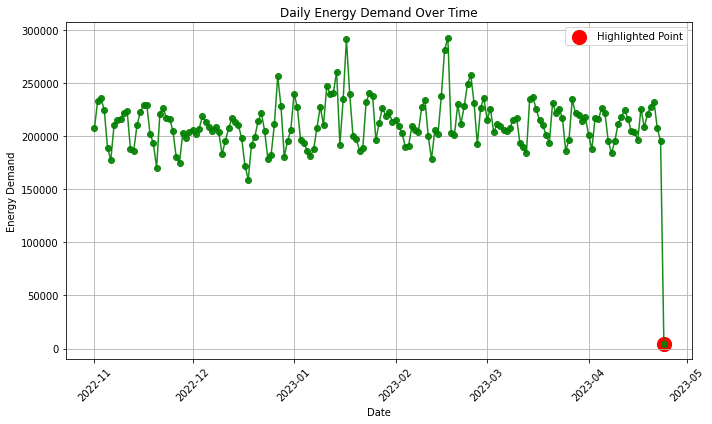

In [41]:
# Inspect the Demand dataset to examine the data on 24.04.23
plt.figure(figsize=(10, 6))
plt.plot(daily_demand_df['Date'], daily_demand_df['Demand (MW)'], marker='o', linestyle='-', color='g', alpha = 0.9)
plt.scatter(daily_demand_df.loc[174, 'Date'], daily_demand_df.loc[174, 'Demand (MW)'], color='r', s=200, label='Highlighted Point')
plt.title('Daily Energy Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# As highlighted, the datapoint on the 24.04.23 is also an outliner on the Demand dataset, so we decided to drop the datapoint.
# Drop data row with missing data. 
data_weather.drop(174, inplace=True)

In [43]:
# Re-examine the data frame 
print(data_weather.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64


In [44]:
# Check that the row has been dropped
data_weather.shape

(174, 13)

In [45]:
#Merge 2 dataset on Date column:
weather_demand_df = pd.merge(data_weather, daily_demand_df, how='left', on='Date')

In [46]:
weather_demand_df.head()

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm wind speed (km/h),3pm MSL pressure (hPa),Demand (MW)
0,2022-11-01,8.5,13.3,3.0,44.0,12.0,64,13,991.3,13.2,59.0,11.0,991.5,207429.46
1,2022-11-02,6.9,15.7,2.8,43.0,11.0,65,9,1006.7,15.1,54.0,13.0,1008.4,233630.93
2,2022-11-03,9.1,15.4,0.4,31.0,11.5,70,9,1019.2,13.8,67.0,9.0,1021.3,235672.34
3,2022-11-04,10.2,17.8,0.2,24.0,12.3,84,6,1028.1,16.9,56.0,9.0,1026.6,224895.28
4,2022-11-05,11.8,22.7,0.0,31.0,14.0,78,9,1026.3,18.8,65.0,11.0,1023.2,189190.35


In [47]:
print(weather_demand_df.dtypes)

Date                                 datetime64[ns]
Minimum temperature (°C)                    float64
Maximum temperature (°C)                    float64
Rainfall (mm)                               float64
Speed of maximum wind gust (km/h)           float64
9am Temperature (°C)                        float64
9am relative humidity (%)                     int64
9am wind speed (km/h)                         int64
9am MSL pressure (hPa)                      float64
3pm Temperature (°C)                        float64
3pm relative humidity (%)                   float64
3pm wind speed (km/h)                       float64
3pm MSL pressure (hPa)                      float64
Demand (MW)                                 float64
dtype: object


In [48]:
print(weather_demand_df.isnull().sum())

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Speed of maximum wind gust (km/h)    0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
Demand (MW)                          0
dtype: int64


In [49]:
weather_demand_df.to_csv('weather_demand_df.csv', index=False)

## 2. DATA EXPLORATION ##

## Assessing Weather-Demand Relationships with a Correlation Matrix ##

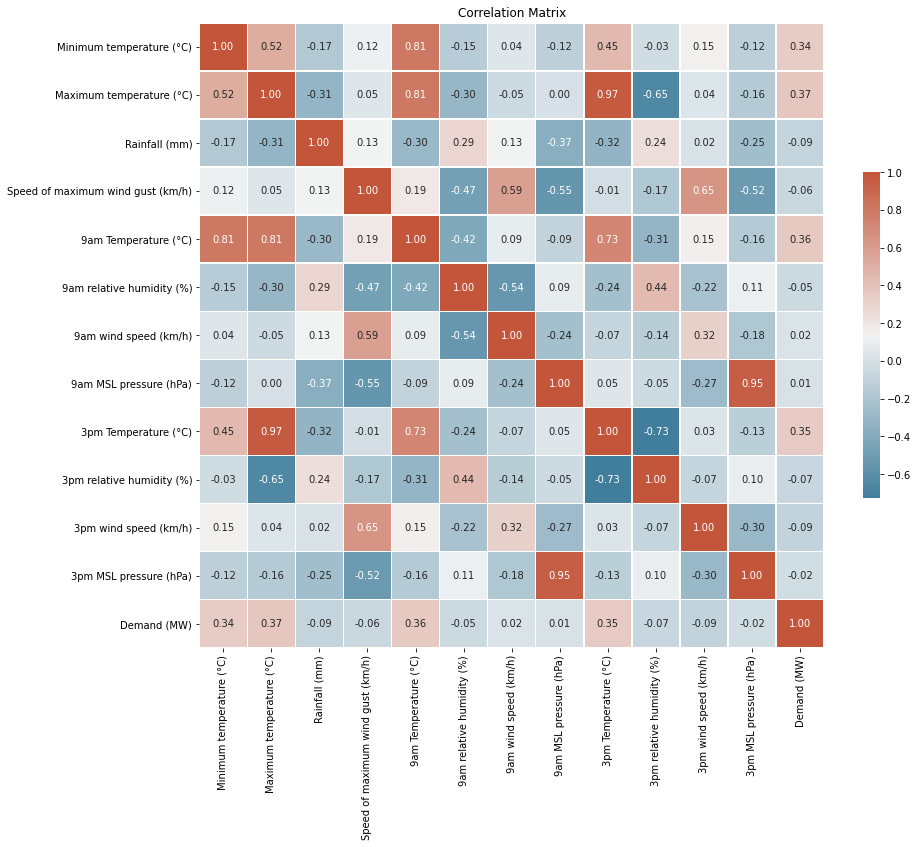

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' columns in both datasets are of the same type (string)
weather_demand_df['Date'] = weather_demand_df['Date'].astype(str)

# Define the columns for the correlation matrix
correlation_columns = [
    'Minimum temperature (°C)', 
    'Maximum temperature (°C)', 
    'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', 
    '9am Temperature (°C)', 
    '9am relative humidity (%)', 
    '9am wind speed (km/h)', 
    '9am MSL pressure (hPa)', 
    '3pm Temperature (°C)', 
    '3pm relative humidity (%)', 
    '3pm wind speed (km/h)', 
    '3pm MSL pressure (hPa)', 
    'Demand (MW)'
]

# Compute the correlation matrix using the relevant columns
correlation_matrix_final = weather_demand_df[correlation_columns].corr()

# Set the figure size
plt.figure(figsize=(14, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix_final, cmap=cmap, annot=True, fmt=".2f", 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Set the title of the plot
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Linear Assumption of the Correlation Matrix: The correlation matrix is based on Pearson's correlation coefficient, which assumes linear relationships between variables. This poses a limitation, especially if the dataset's underlying relationships are non-linear.

-> Need for further exploration: Given the linear assumption of the matrix, we had to discern whether the interplay between weather variables and energy demand was linear or non-linear.


## Visual Inspection of Weather Metrics vs. Demand Using Faceted Scatterplots ##

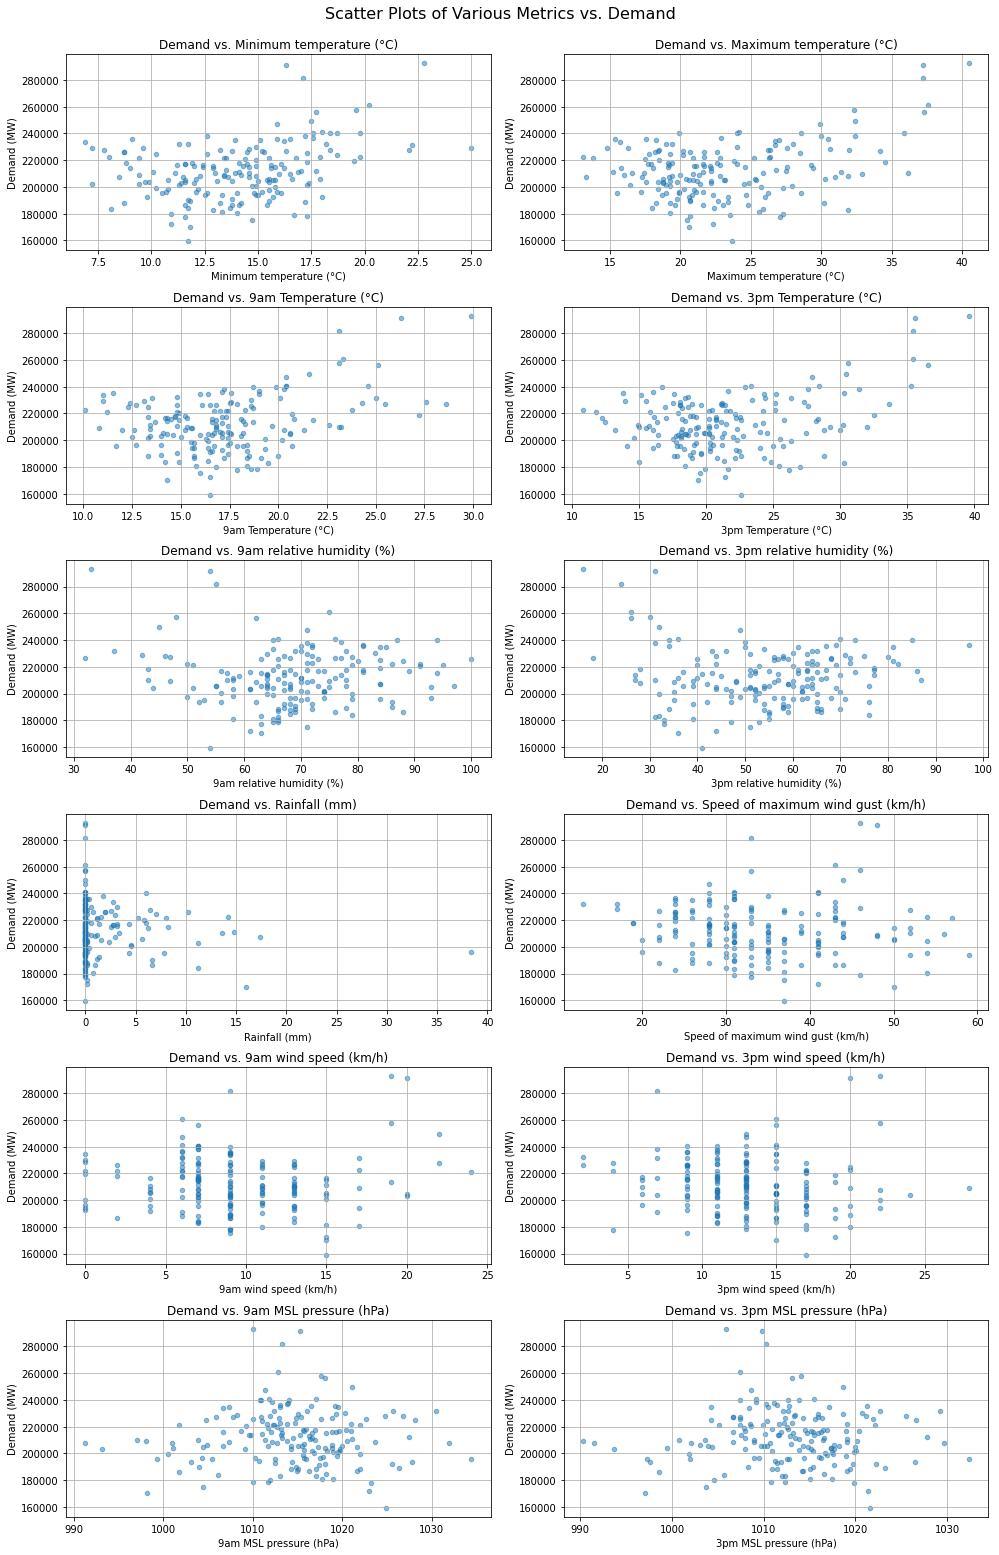

In [51]:
# List of columns for scatter plots against 'Demand'
scatter_columns = [
    'Minimum temperature (°C)',
    'Maximum temperature (°C)',
    '9am Temperature (°C)',
    '3pm Temperature (°C)',
    '9am relative humidity (%)',
    '3pm relative humidity (%)',
    'Rainfall (mm)',
    'Speed of maximum wind gust (km/h)',
    '9am wind speed (km/h)',
    '3pm wind speed (km/h)',
    '9am MSL pressure (hPa)',
    '3pm MSL pressure (hPa)',
]

# Number of rows and columns for the facet plot
n_rows = 6
n_cols = 2

# Create the updated facet plot with "Demand (MW)" as the y-axis label
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 22))
fig.suptitle('Scatter Plots of Various Metrics vs. Demand', fontsize=16)

for idx, column in enumerate(scatter_columns):
    ax = axes[idx // n_cols, idx % n_cols]
    weather_demand_df.plot(x=column, y='Demand (MW)', kind='scatter', ax=ax, alpha=0.5)
    ax.set_title(f'Demand vs. {column}')
    ax.set_ylabel('Demand (MW)')
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## Quantifying the Dependence between Weather Metrics and Demand Using Normalised Mutual Information ##

In [52]:
from scipy.stats import entropy
from sklearn.metrics import normalized_mutual_info_score
from scipy import stats
import pandas as pd

# Function to remove outliers from a column
def remove_outliers(df, column_name, z_threshold=3):
    z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()
    cleaned_data = df[abs(z_scores) < z_threshold].copy()
    return cleaned_data

# Function to calculate NMI for a column against 'Demand (MW)'
def calculate_nmi(df, column_name, demand_column_name='Demand (MW)'):
    # Remove outliers in the column
    df_no_outliers = remove_outliers(df, column_name, z_threshold=3)

    # Calculate the bin size using the Freedman-Diaconis Rule
    iqr = df_no_outliers[column_name].quantile(0.75) - df_no_outliers[column_name].quantile(0.25)
    bin_size = 2 * iqr / (len(df_no_outliers[column_name]) ** (1/3))

    # Calculate the number of bins
    data_min = df_no_outliers[column_name].min()
    data_max = df_no_outliers[column_name].max()
    num_bins = int((data_max - data_min) / bin_size)

    # Discretize the column into bins
    bin_column_name = f"{column_name}_bins"
    df_no_outliers.loc[:, bin_column_name] = pd.cut(df_no_outliers[column_name], bins=num_bins, labels=False)

    # Calculate the NMI between the binned column and the 'Demand (MW)' column
    nmi_value = normalized_mutual_info_score(df_no_outliers[bin_column_name], df_no_outliers[demand_column_name])
    
    # Store the NMI value in the nmi_results dictionary
    nmi_results[column_name] = nmi_value

    return df_no_outliers

# Columns to process: exclude "_bins" columns, moving averages, "Date", and "Demand (MW)"
attributes_to_process = [col for col in weather_demand_df.columns if not (col.endswith("_bins") or col.endswith("_MA_24") or col in ["Date", "Demand (MW)"])]

# Dictionary to store NMI values
nmi_results = {}

# Calculate and print NMI for the attributes
for attribute in attributes_to_process:
    weather_demand_df = calculate_nmi(weather_demand_df, attribute)
    print(f"NMI of {attribute} and Demand (MW): {nmi_results[attribute]:.4f}")

NMI of Minimum temperature (°C) and Demand (MW): 0.5688
NMI of Maximum temperature (°C) and Demand (MW): 0.5555
NMI of Rainfall (mm) and Demand (MW): 0.4568
NMI of Speed of maximum wind gust (km/h) and Demand (MW): 0.5448
NMI of 9am Temperature (°C) and Demand (MW): 0.5939
NMI of 9am relative humidity (%) and Demand (MW): 0.6120
NMI of 9am wind speed (km/h) and Demand (MW): 0.5617
NMI of 9am MSL pressure (hPa) and Demand (MW): 0.6076
NMI of 3pm Temperature (°C) and Demand (MW): 0.5766
NMI of 3pm relative humidity (%) and Demand (MW): 0.5584
NMI of 3pm wind speed (km/h) and Demand (MW): 0.5928
NMI of 3pm MSL pressure (hPa) and Demand (MW): 0.6011


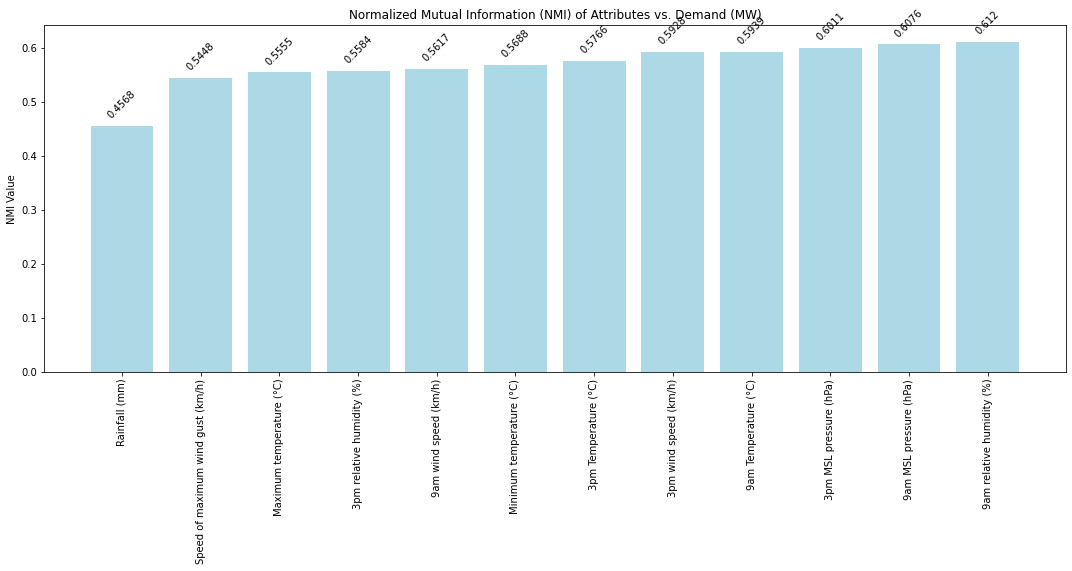

In [53]:
# Sorting the nmi_results dictionary based on NMI values in ascending order
sorted_nmi_results = dict(sorted(nmi_results.items(), key=lambda item: item[1]))

# Plotting the NMI values with rotated values on the bars
plt.figure(figsize=(15, 8))
bars = plt.bar(sorted_nmi_results.keys(), sorted_nmi_results.values(), color='lightblue')

# Adding NMI values on top of the bars with clockwise rotation
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom', rotation=45, color='black', fontsize=10)

plt.xticks(rotation=90)
plt.ylabel("NMI Value")
plt.title("Normalized Mutual Information (NMI) of Attributes vs. Demand (MW)")
plt.tight_layout()
plt.show()

## Explore the relationship between Pricing and Demand with relation to Weather condition ##

In [54]:
# Calculate 24-hour moving average for 'Price'
data_price_demand['Price_MA_24'] = data_price_demand['Price'].rolling(window=24).mean()

# Calculate 24-hour moving average for 'Demand'
data_price_demand['Demand_MA_24'] = data_price_demand['Demand (MW)'].rolling(window=24).mean()

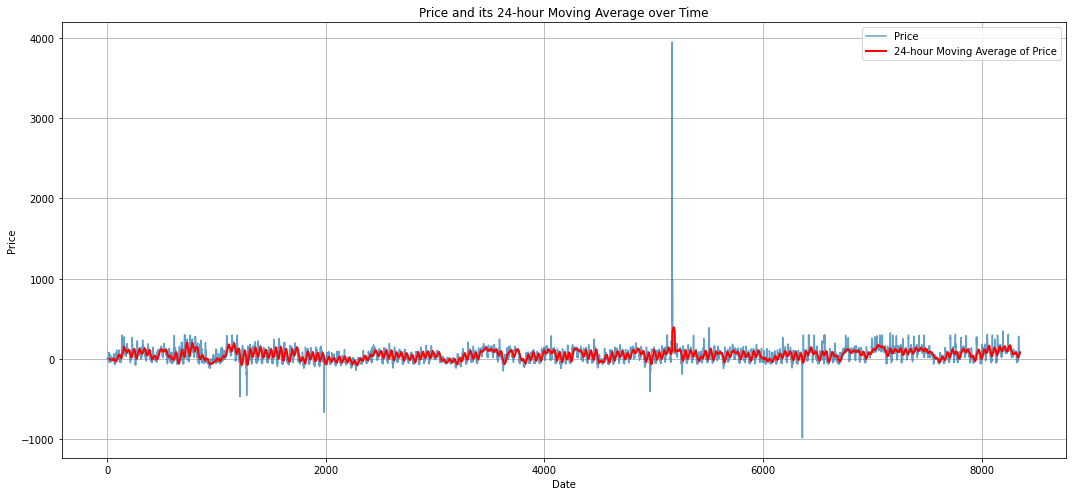

In [55]:
# Plotting the 'Price' and 'Price_MA_24' over time
plt.figure(figsize=(15, 7))
data_price_demand['Price'].plot(label='Price', alpha=0.7)
data_price_demand['Price_MA_24'].plot(label='24-hour Moving Average of Price', color='red', linewidth=2)
plt.title('Price and its 24-hour Moving Average over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

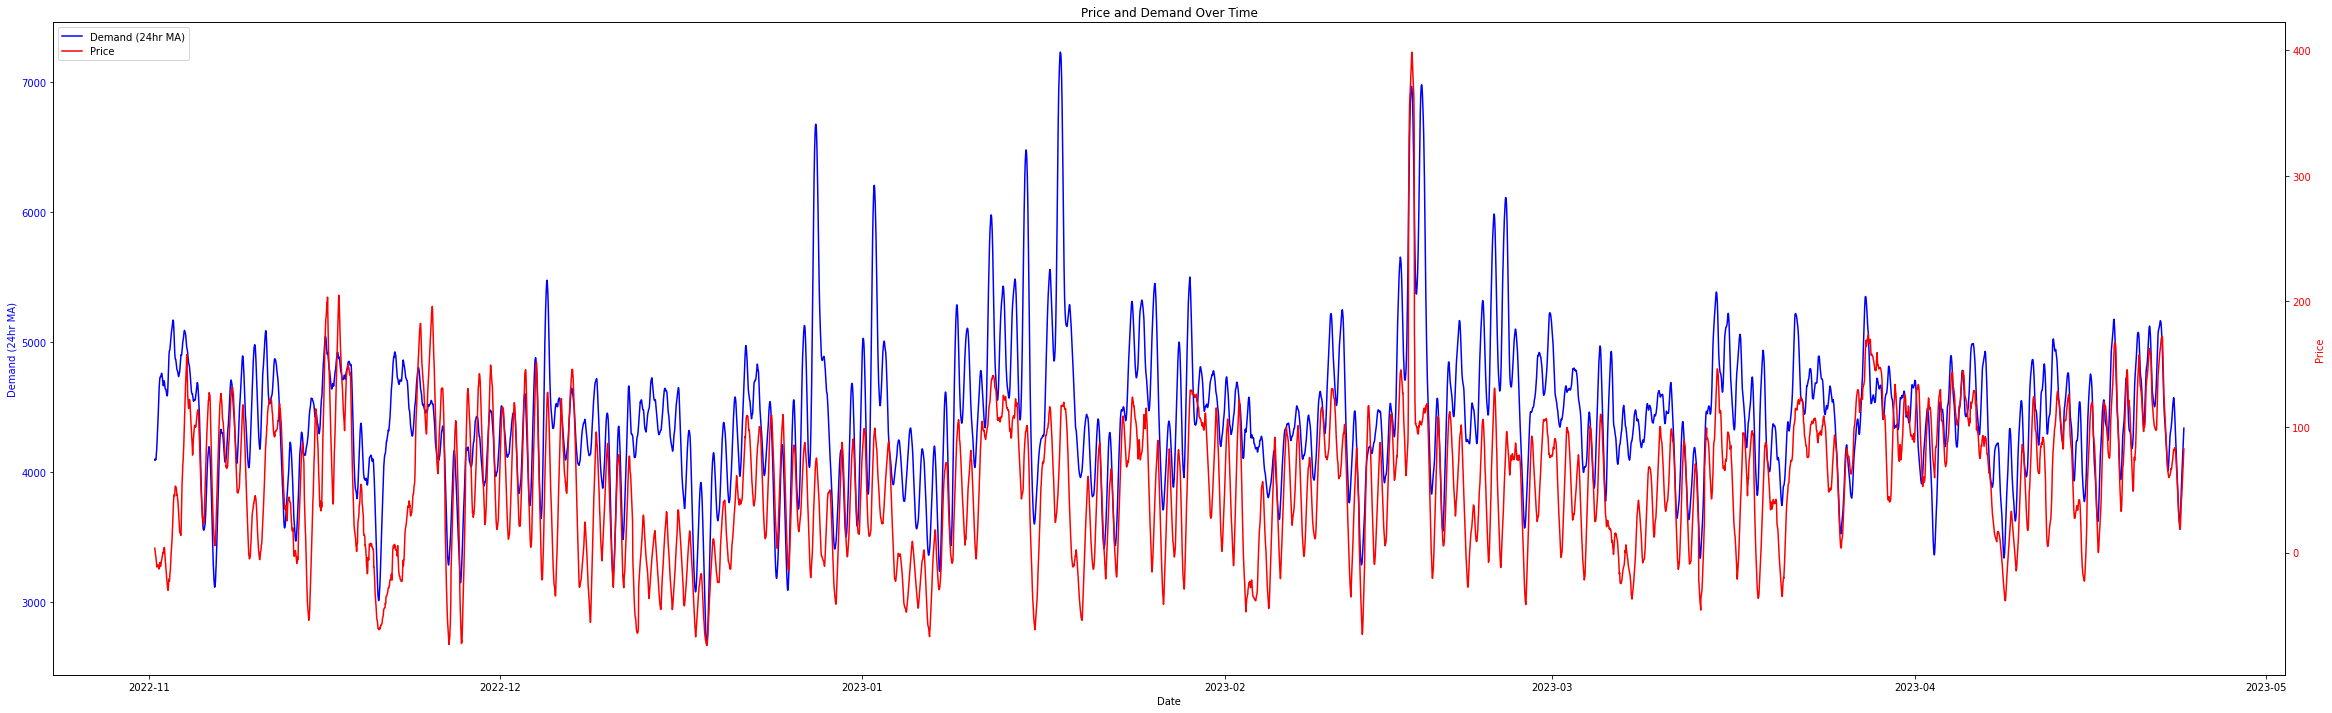

In [56]:
# Plotting Price and Demand over 30 minutes window

# Create a figure and axis object
fig, ax1 = plt.subplots(figsize=(40, 12))

# Plot demand using the first y-axis (left)
ax1.plot(data_price_demand['Date_Time'], data_price_demand['Demand_MA_24'], color='b', label='Demand (24hr MA)')
ax1.set_xlabel('Date')
ax1.set_ylabel('Demand (24hr MA)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for price
ax2 = ax1.twinx()
ax2.plot(data_price_demand['Date_Time'], data_price_demand['Price_MA_24'], color='r', label='Price')
ax2.set_ylabel('Price', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Combine the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Set a title for the combined plot
plt.title('Price and Demand Over Time')

# Display the plot
plt.show()

In [57]:
#Outliner detection:
max_price_index = data_price_demand['Price'].idxmax()
print(max_price_index)

5169


In [58]:
max_price_row = data_price_demand.loc[5169]

In [59]:
display(max_price_row)

State                          VIC1
Date_Time       2023-02-16 17:00:00
Demand (MW)                 8386.17
Price                       3944.96
Trade_Status                  TRADE
Date                     2023-02-16
Price_MA_24                 279.376
Demand_MA_24                6042.79
Name: 5169, dtype: object

In [60]:
#Inspect the weather dataset for insight:
desired_date = '2023-02-16'
row_with_desired_date = weather_demand_df[weather_demand_df['Date'] == desired_date]
display(row_with_desired_date)

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),...,Rainfall (mm)_bins,Speed of maximum wind gust (km/h)_bins,9am Temperature (°C)_bins,9am relative humidity (%)_bins,9am wind speed (km/h)_bins,9am MSL pressure (hPa)_bins,3pm Temperature (°C)_bins,3pm relative humidity (%)_bins,3pm wind speed (km/h)_bins,3pm MSL pressure (hPa)_bins
107,2023-02-16,17.1,37.2,0.0,33.0,23.1,55,9,1013.3,35.4,...,0,3,9,3,6,6,10,0,3,4


### Possible reasons ###
1. Hot temperatures of around 37.2°C drove high demand

In [61]:
min_value_temp = weather_demand_df['Maximum temperature (°C)'].min()
max_value_temp = weather_demand_df['Maximum temperature (°C)'].max()
print(min_value_temp,max_value_temp)

13.1 37.6


2. Extremely low output from wind generation (9km/h) reduced the amount of low-priced capacity available because wind is typically offered at negative prices. Inspection of win speed column confirms the assumption

In [62]:
min_value_9am = weather_demand_df['9am wind speed (km/h)'].min()
max_value_9am = weather_demand_df['9am wind speed (km/h)'].max()
min_value_3pm = weather_demand_df['3pm wind speed (km/h)'].min()
max_value_3pm = weather_demand_df['3pm wind speed (km/h)'].max()

In [63]:
print(min_value_9am, max_value_9am)

0 22


In [64]:
print(min_value_3pm, max_value_3pm)

2.0 24.0


## 3. PREDICTIVE ANALYSIS ##

## Reducing Dimensions using Principal Component Analysis ##

In [65]:
#PCA TEST

In [66]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Define the features list
features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
            'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
            '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
            '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

# Extract the features
X = weather_demand_df[features]

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the feature matrix
X_standardized = StandardScaler().fit_transform(X_imputed)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# Create a DataFrame to display the PCA results
pca_results_df = pd.DataFrame({
    'Principal Component': [f'PC{i}' for i in range(1, pca.n_components_ + 1)],
    'Explained Variance': pca.explained_variance_,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': pca.explained_variance_ratio_.cumsum()
})

pca_results_df
\

,Principal Component,Explained Variance,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,4.023562,0.333227,0.333227
1,PC2,2.767381,0.229192,0.562419
2,PC3,1.886241,0.156216,0.718635
3,PC4,1.080823,0.089513,0.808148
4,PC5,0.749828,0.062100,0.870248
5,PC6,0.714115,0.059142,0.929390
6,PC7,0.324125,0.026844,0.956234
7,PC8,0.241311,0.019985,0.976219
8,PC9,0.185336,0.015349,0.991568
9,PC10,0.058822,0.004872,0.996440


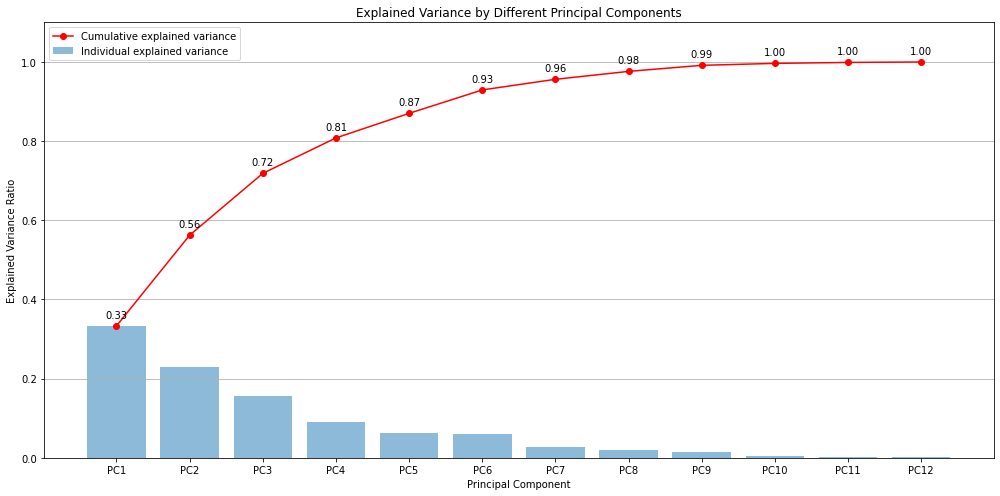

In [67]:
# Plotting with annotated cumulative explained variance and labeled PCs on the x-axis
plt.figure(figsize=(14, 7))

# Bar chart
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')

# Curved line plot
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), color='r', marker='o', label='Cumulative explained variance')

# Annotating the cumulative explained variance values
for i, value in enumerate(pca.explained_variance_ratio_.cumsum()):
    plt.annotate(f"{value:.2f}", (i+1, value+0.02), ha='center')

# Setting x-ticks to label each principal component
plt.xticks(range(1, len(pca.explained_variance_ratio_)+1), [f'PC{i}' for i in range(1, len(pca.explained_variance_ratio_)+1)])

plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Different Principal Components')
plt.legend(loc='upper left')
plt.ylim(0, 1.1)  # Adjusting y-axis limits to better fit annotations
plt.grid(True, which='both', axis='y')
plt.tight_layout()
plt.show()

In [68]:
# the first 7 components explain 96% of the variance

In [69]:
# use PCA because it seems least arbirtrary

### Linear Regression with PCA ###

In [70]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []
all_actual_values = []

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Standard Scaling
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    # Handling missing values
    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)
    
    # Apply PCA
    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)
    
    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_train_fold, y_train_fold)
    
    # Predict on test set
    y_pred = lr.predict(X_test_fold) 
    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    # Calculate mean squared error
    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for Linear Regression
predicted_values_lr = all_predicted_values
actual_values_lr = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
average_mse = sum(mse_scores) / len(mse_scores)
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {average_mse}")
linear_rmse = np.sqrt(average_mse)
print(f"Root Mean Squared Error (RMSE): {linear_rmse:.2f}")

[266482427.88304448, 603301641.2864742, 290996022.7029612, 355925946.00892943, 354327007.6080923, 224937837.6921556, 389941488.885719, 225872482.2670489, 332337124.24757504, 743729854.970896]
Average Mean Squared Error across all folds: 378785183.3552896
Root Mean Squared Error (RMSE): 19462.40


### K-Nearest Neighbors ###

In [71]:
from sklearn.neighbors import KNeighborsRegressor

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []  # List to store predicted values for all folds
all_actual_values = []     # List to store actual values for all folds

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    knn = KNeighborsRegressor(n_neighbors=6)
    knn.fit(X_train_fold, y_train_fold)

    y_pred = knn.predict(X_test_fold)

    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for kNN
predicted_values_knn = all_predicted_values
actual_values_knn = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
avg_mse = sum(mse_scores) / k
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {avg_mse:.2f}")
knn_rmse = np.sqrt(avg_mse)
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.2f}")

[275485438.46073294, 513525385.22048223, 251583310.9037214, 297325393.4811163, 282871977.4345517, 149534513.75286913, 289336093.69074166, 236997792.30127376, 288429805.1422386, 419631244.4771476]
Average Mean Squared Error across all folds: 300472095.49
Root Mean Squared Error (RMSE): 17334.13


### Random Forest ###

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Extract selected features
selected_features = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                     'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                     '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                     '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

X = weather_demand_df[selected_features]
y = weather_demand_df['Demand (MW)']

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores = []
all_predicted_values = []  # List to store predicted values for all folds
all_actual_values = []     # List to store actual values for all folds

for train_index, test_index in kf.split(X):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees in the forest
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_test_fold)

    all_predicted_values.extend(y_pred)
    all_actual_values.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores.append(mse)

# Store the values for Random Forest
predicted_values_rf = all_predicted_values
actual_values_rf = all_actual_values

# Reset lists for the next model
all_predicted_values = []
all_actual_values = []

# Calculate average MSE across all folds
avg_mse = sum(mse_scores) / k
print(mse_scores)
print(f"Average Mean Squared Error across all folds: {avg_mse:.2f}")
random_rmse = np.sqrt(avg_mse)
print(f"Root Mean Squared Error (RMSE): {random_rmse:.2f}")

[196549097.36225998, 755526750.116319, 201441904.2759033, 328104210.192586, 426493310.7027221, 156495168.9645216, 294640827.5853744, 256408659.96949103, 345505550.136618, 412137565.57306355]
Average Mean Squared Error across all folds: 337330304.49
Root Mean Squared Error (RMSE): 18366.55


The RMSE, being in the same unit as the target variable, tells us that on average, the Random Forest model's predictions are off by about 19,009.64 MW from the actual values.

Comparison with Data Range: The Demand data spans 9,884 MW, but the RMSE is 19,009.64 MW, which is significantly larger than this range. This suggests that the model's predictions can sometimes deviate quite substantially from the actual values.

Comparison with Standard Deviation: The standard deviation of the Demand data is 2,788.79 MW. Given that the RMSE (19,009.64 MW) is much larger than this standard deviation, it indicates that the model's predictions might not be very accurate relative to the inherent variability in the data.

Given the RMSE in relation to the data's descriptive statistics, it appears that the Random Forest model might not be performing optimally for this dataset.

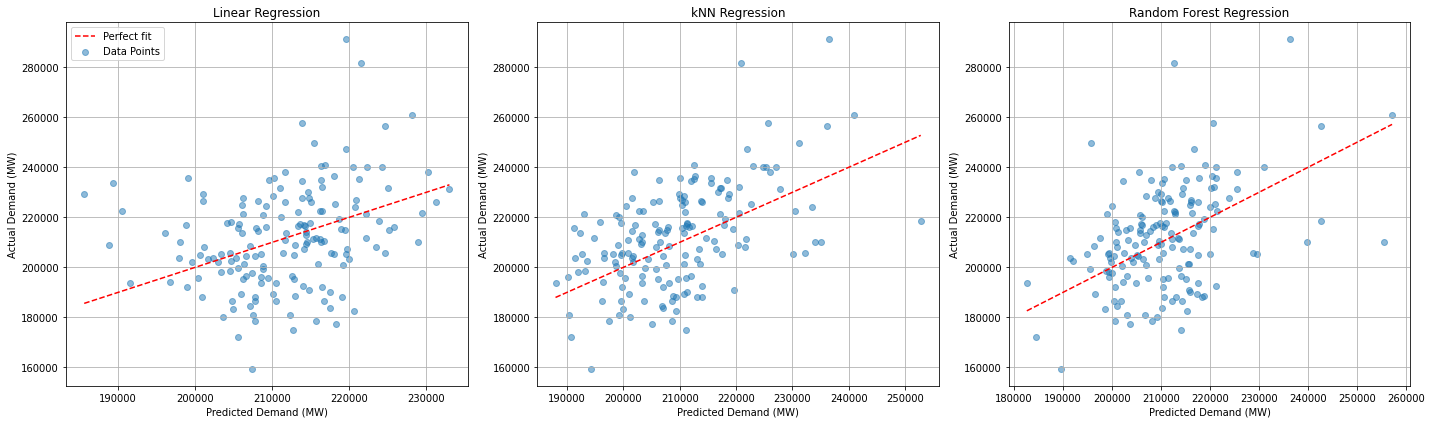

In [73]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Linear Regression Plot
axes[0].scatter(predicted_values_lr, actual_values_lr, alpha=0.5, label="Data Points")
axes[0].plot([min(predicted_values_lr), max(predicted_values_lr)], 
             [min(predicted_values_lr), max(predicted_values_lr)], 'r--', label="Perfect fit")
axes[0].set_xlabel('Predicted Demand (MW)')
axes[0].set_ylabel('Actual Demand (MW)')
axes[0].set_title('Linear Regression')
axes[0].legend(loc="upper left")
axes[0].grid(True)

# kNN Regression Plot
axes[1].scatter(predicted_values_knn, actual_values_knn, alpha=0.5)
axes[1].plot([min(predicted_values_knn), max(predicted_values_knn)], 
             [min(predicted_values_knn), max(predicted_values_knn)], 'r--')
axes[1].set_xlabel('Predicted Demand (MW)')
axes[1].set_ylabel('Actual Demand (MW)')
axes[1].set_title('kNN Regression')
axes[1].grid(True)

# Random Forest Regression Plot
axes[2].scatter(predicted_values_rf, actual_values_rf, alpha=0.5)
axes[2].plot([min(predicted_values_rf), max(predicted_values_rf)], 
             [min(predicted_values_rf), max(predicted_values_rf)], 'r--')
axes[2].set_xlabel('Predicted Demand (MW)')
axes[2].set_ylabel('Actual Demand (MW)')
axes[2].set_title('Random Forest Regression')
axes[2].grid(True)

plt.tight_layout()
plt.show()

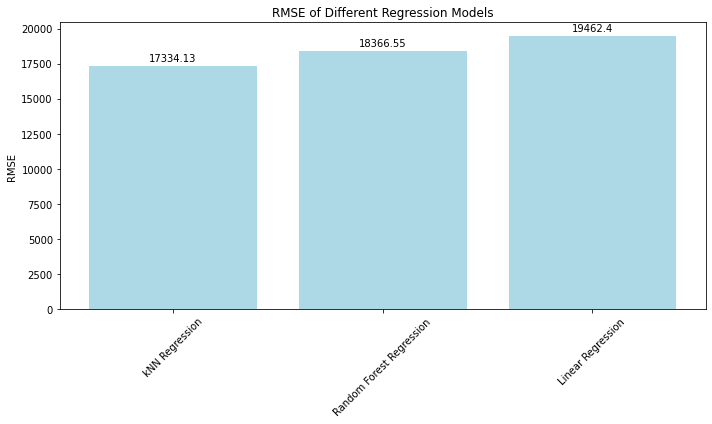

In [74]:
# Create a DataFrame to display the RMSE results
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN Regression', 'Random Forest Regression'],
    'RMSE': [linear_rmse, knn_rmse, random_rmse]
})

# Sort the dataframe in ascending order of RMSE
rmse_df_sorted = rmse_df.sort_values(by='RMSE')

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_df_sorted['Model'], rmse_df_sorted['RMSE'], color='lightblue')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regression Models')
plt.xticks(rotation=45)

# Label the bars with the RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 200, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [75]:
# Insights derived from the RMSE table based on the provided descriptive statistics of the target variable:

# Linear Regression:
# - The RMSE (19807.95 MW) being in the same unit as the target variable, 
#   tells us that on average, the model's predictions are off by about 19,807.95 MW from the actual values.
# - Comparison with Data Range: The demand data spans from 104 MW to 9,988 MW, 
#   giving a total range of 9,884 MW. The RMSE of 19,807.95 MW is twice the range of the data. 
#   This indicates that the model's predictions can sometimes deviate quite substantially from the actual values.
# - Comparison with Standard Deviation: The standard deviation of the demand data is 2,788.79 MW. 
#   The RMSE of 19,807.95 MW is seven times larger than this standard deviation, 
#   suggesting that the model's predictions might not be very accurate relative to the inherent variability in the data.

# kNN Regression:
# - The RMSE of 17,356.99 MW means that on average, the predictions of the kNN model deviate 
#   by this amount from the actual values.
# - Comparison with Data Range: With an RMSE that's close to twice the data's range, 
#   the kNN model's predictions can also be quite off from the actual values at times.
# - Comparison with Standard Deviation: The RMSE is approximately 6.2 times the standard deviation 
#   of the demand data, indicating that the prediction errors of the kNN model are substantial 
#   compared to the variability of the data.

# Random Forest Regression:
# - The RMSE of 17,227.21 MW shows that, on average, the Random Forest model's predictions 
#   are off by this magnitude from the true values.
# - Comparison with Data Range: The RMSE is close to twice the range of the demand data, 
#   suggesting significant deviations in the model's predictions.
# - Comparison with Standard Deviation: With an RMSE that's about 6.2 times the standard deviation 
#   of the data, the Random Forest model's predictions might not be highly accurate considering 
#   the data's natural variability.

# Most Predictive Model: The KNN model has the lowest RMSE, 
# making it the most predictive among the three models in this context.
# Least Predictive Model: The Linear Regression model, with the highest RMSE, 
# appears to be the least predictive.

# Overall Insights:
# Considering the RMSE values in relation to the provided descriptive statistics of the demand data, 
# it appears that none of the models are performing optimally for this dataset. 
# The prediction errors, on average, are quite large when compared to the natural variability and range of the data. 
# Further model tuning, feature engineering, or considering other modeling techniques 
# might be necessary to improve the prediction performance.

## Refining Predictive Modelling with Moving Averages ##

In [76]:
import matplotlib.pyplot as plt

# Columns for which the moving average needs to be calculated and plotted
columns_to_plot = [
    'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
    '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
    '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'
]

# Calculate and save the 24-hour moving average for each column in the weather_demand_df DataFrame
for col in columns_to_plot:
    weather_demand_df[col+'_MA_24'] = weather_demand_df[col].rolling(window=24).mean()

weather_demand_df.to_csv('moving_averages.csv', index=False)

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the existing moving_averages.csv file
moving_averages_df = pd.read_csv('moving_averages.csv')

# Calculate 24-hour moving average for 'Price'
data_price_demand['Price_MA_24'] = data_price_demand['Price'].rolling(window=24).mean()

# Calculate 24-hour moving average for 'Demand'
data_price_demand['Demand_MA_24'] = data_price_demand['Demand (MW)'].rolling(window=24).mean()

# Append the calculated moving averages to the existing moving_averages_df
moving_averages_df['Price_MA_24'] = data_price_demand['Price_MA_24']
moving_averages_df['Demand_MA_24'] = data_price_demand['Demand_MA_24']

# Save the updated moving_averages_df to the same file
moving_averages_df.to_csv('moving_averages.csv', index=False)

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Load the moving_averages.csv file
moving_averages_df = pd.read_csv('moving_averages.csv')

# Extracting 24-hour moving averages as features
selected_features_ma = ['Minimum temperature (°C)_MA_24', 'Maximum temperature (°C)_MA_24', 'Rainfall (mm)_MA_24', 
                     'Speed of maximum wind gust (km/h)_MA_24', '9am Temperature (°C)_MA_24', '9am relative humidity (%)_MA_24', 
                     '9am wind speed (km/h)_MA_24', '9am MSL pressure (hPa)_MA_24', '3pm Temperature (°C)_MA_24', 
                     '3pm relative humidity (%)_MA_24', '3pm wind speed (km/h)_MA_24', '3pm MSL pressure (hPa)_MA_24']

X_ma = moving_averages_df[selected_features_ma].dropna()
y_ma = moving_averages_df.loc[X_ma.index, 'Demand_MA_24']

n_splits = 10
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

mse_scores_ma = []
all_predicted_values_ma = []
all_actual_values_ma = []

for train_index, test_index in kf.split(X_ma):
    X_train_fold, X_test_fold = X_ma.iloc[train_index], X_ma.iloc[test_index]
    y_train_fold, y_test_fold = y_ma.iloc[train_index], y_ma.iloc[test_index]

    # Standard Scaling
    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)
    
    # Handling missing values
    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)
    
    # Apply PCA
    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)
    
    # Train linear regression model
    lr = LinearRegression()
    lr.fit(X_train_fold, y_train_fold)
    
    # Predict on test set
    y_pred = lr.predict(X_test_fold)
    all_predicted_values_ma.extend(y_pred)
    all_actual_values_ma.extend(y_test_fold.values)

    # Calculate mean squared error
    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_ma.append(mse)

# Calculate average MSE across all folds
average_mse_ma = sum(mse_scores_ma) / len(mse_scores_ma)
linear_rmse_ma = np.sqrt(average_mse_ma)

print(mse_scores_ma)
print(f"Average Mean Squared Error across all folds: {average_mse_ma}")
print(f"Root Mean Squared Error (RMSE): {linear_rmse_ma:.2f}")

[22391.06388173164, 14118.709169797366, 34862.7827015101, 9103.58202938194, 20084.77275935484, 25685.57635344298, 16631.875680705154, 9374.5802984043, 16673.93473513239, 12619.02875930846]
Average Mean Squared Error across all folds: 18154.590636876914
Root Mean Squared Error (RMSE): 134.74


In [79]:
from sklearn.neighbors import KNeighborsRegressor

# Using the same selected features as before
X_ma_knn = moving_averages_df[selected_features_ma].dropna()
y_ma_knn = moving_averages_df.loc[X_ma_knn.index, 'Demand_MA_24']

k = 10
kf_knn = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores_knn = []
all_predicted_values_knn = []
all_actual_values_knn = []

for train_index, test_index in kf_knn.split(X_ma_knn):
    X_train_fold, X_test_fold = X_ma_knn.iloc[train_index], X_ma_knn.iloc[test_index]
    y_train_fold, y_test_fold = y_ma_knn.iloc[train_index], y_ma_knn.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    knn = KNeighborsRegressor(n_neighbors=6)
    knn.fit(X_train_fold, y_train_fold)

    y_pred = knn.predict(X_test_fold)

    all_predicted_values_knn.extend(y_pred)
    all_actual_values_knn.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_knn.append(mse)

# Calculate average MSE across all folds
avg_mse_knn = sum(mse_scores_knn) / k
knn_rmse = np.sqrt(avg_mse_knn)

print(mse_scores_knn)
print(f"Average Mean Squared Error across all folds: {avg_mse_knn}")
print(f"Root Mean Squared Error (RMSE): {knn_rmse:.2f}")

[3047.849699660366, 1760.4207282241962, 2991.400642345318, 3812.1656671661617, 1281.1139646301706, 3246.074075163647, 3193.759539072838, 6939.930149273193, 2151.486216146867, 3475.9513217848503]
Average Mean Squared Error across all folds: 3190.015200346761
Root Mean Squared Error (RMSE): 56.48


In [80]:
from sklearn.ensemble import RandomForestRegressor

# Using the same selected features as before
X_ma_rf = moving_averages_df[selected_features_ma].dropna()
y_ma_rf = moving_averages_df.loc[X_ma_rf.index, 'Demand_MA_24']

k = 10
kf_rf = KFold(n_splits=k, shuffle=True, random_state=42)

mse_scores_rf = []
all_predicted_values_rf = []
all_actual_values_rf = []

for train_index, test_index in kf_rf.split(X_ma_rf):
    X_train_fold, X_test_fold = X_ma_rf.iloc[train_index], X_ma_rf.iloc[test_index]
    y_train_fold, y_test_fold = y_ma_rf.iloc[train_index], y_ma_rf.iloc[test_index]

    scaler = StandardScaler()
    X_train_fold = scaler.fit_transform(X_train_fold)
    X_test_fold = scaler.transform(X_test_fold)

    imputer = SimpleImputer()
    X_train_fold = imputer.fit_transform(X_train_fold)
    X_test_fold = imputer.transform(X_test_fold)

    pca = PCA(n_components=7)
    X_train_fold = pca.fit_transform(X_train_fold)
    X_test_fold = pca.transform(X_test_fold)

    rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Using 100 trees in the forest
    rf.fit(X_train_fold, y_train_fold)

    y_pred = rf.predict(X_test_fold)

    all_predicted_values_rf.extend(y_pred)
    all_actual_values_rf.extend(y_test_fold.values)

    mse = mean_squared_error(y_test_fold, y_pred)
    mse_scores_rf.append(mse)

# Calculate average MSE across all folds
avg_mse_rf = sum(mse_scores_rf) / k
random_rmse = np.sqrt(avg_mse_rf)

print(mse_scores_rf)
print(f"Average Mean Squared Error across all folds: {avg_mse_rf}")
print(f"Root Mean Squared Error (RMSE): {random_rmse:.2f}")

[1090.8738335086998, 988.3721328564325, 6042.996206726974, 2465.178063543135, 3359.7721857330107, 4254.093425484739, 1072.7570562378728, 2464.4824974851026, 23980.219597613555, 3597.767278739194]
Average Mean Squared Error across all folds: 4931.651227792872
Root Mean Squared Error (RMSE): 70.23


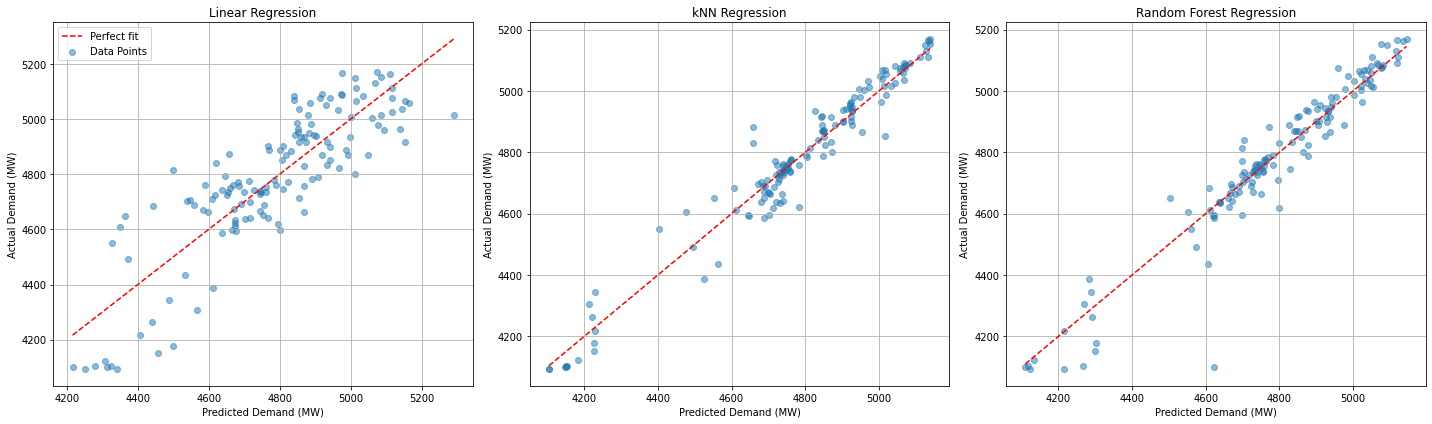

In [81]:
# Plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Linear Regression Plot
axes[0].scatter(all_predicted_values_ma, all_actual_values_ma, alpha=0.5, label="Data Points")
axes[0].plot([min(all_predicted_values_ma), max(all_predicted_values_ma)], 
             [min(all_predicted_values_ma), max(all_predicted_values_ma)], 'r--', label="Perfect fit")
axes[0].set_xlabel('Predicted Demand (MW)')
axes[0].set_ylabel('Actual Demand (MW)')
axes[0].set_title('Linear Regression')
axes[0].legend(loc="upper left")
axes[0].grid(True)

# kNN Regression Plot
axes[1].scatter(all_predicted_values_knn, all_actual_values_knn, alpha=0.5)
axes[1].plot([min(all_predicted_values_knn), max(all_predicted_values_knn)], 
             [min(all_predicted_values_knn), max(all_predicted_values_knn)], 'r--')
axes[1].set_xlabel('Predicted Demand (MW)')
axes[1].set_ylabel('Actual Demand (MW)')
axes[1].set_title('kNN Regression')
axes[1].grid(True)

# Random Forest Regression Plot
axes[2].scatter(all_predicted_values_rf, all_actual_values_rf, alpha=0.5)
axes[2].plot([min(all_predicted_values_rf), max(all_predicted_values_rf)], 
             [min(all_predicted_values_rf), max(all_predicted_values_rf)], 'r--')
axes[2].set_xlabel('Predicted Demand (MW)')
axes[2].set_ylabel('Actual Demand (MW)')
axes[2].set_title('Random Forest Regression')
axes[2].grid(True)

plt.tight_layout()
plt.show()

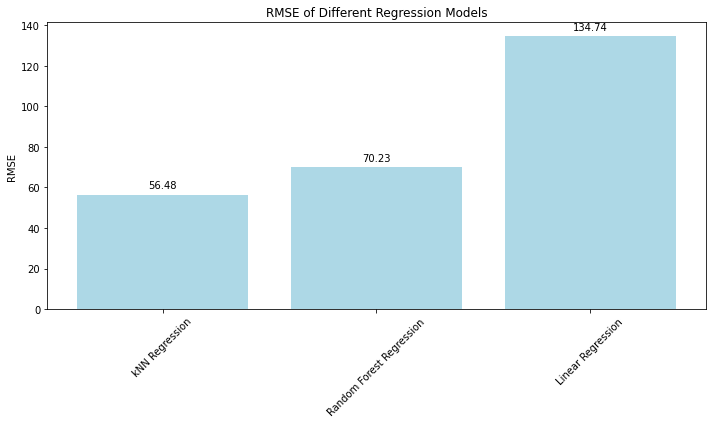

In [82]:
# Create a DataFrame to display the RMSE results
rmse_df = pd.DataFrame({
    'Model': ['Linear Regression', 'kNN Regression', 'Random Forest Regression'],
    'RMSE': [linear_rmse_ma, knn_rmse, random_rmse]
})

# Sort the dataframe in ascending order of RMSE
rmse_df_sorted = rmse_df.sort_values(by='RMSE')

# Plotting the data
plt.figure(figsize=(10, 6))
bars = plt.bar(rmse_df_sorted['Model'], rmse_df_sorted['RMSE'], color='lightblue')
plt.ylabel('RMSE')
plt.title('RMSE of Different Regression Models')
plt.xticks(rotation=45)

# Label the bars with the RMSE values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## APPENDIX ##

## Moving average for weather variables ##

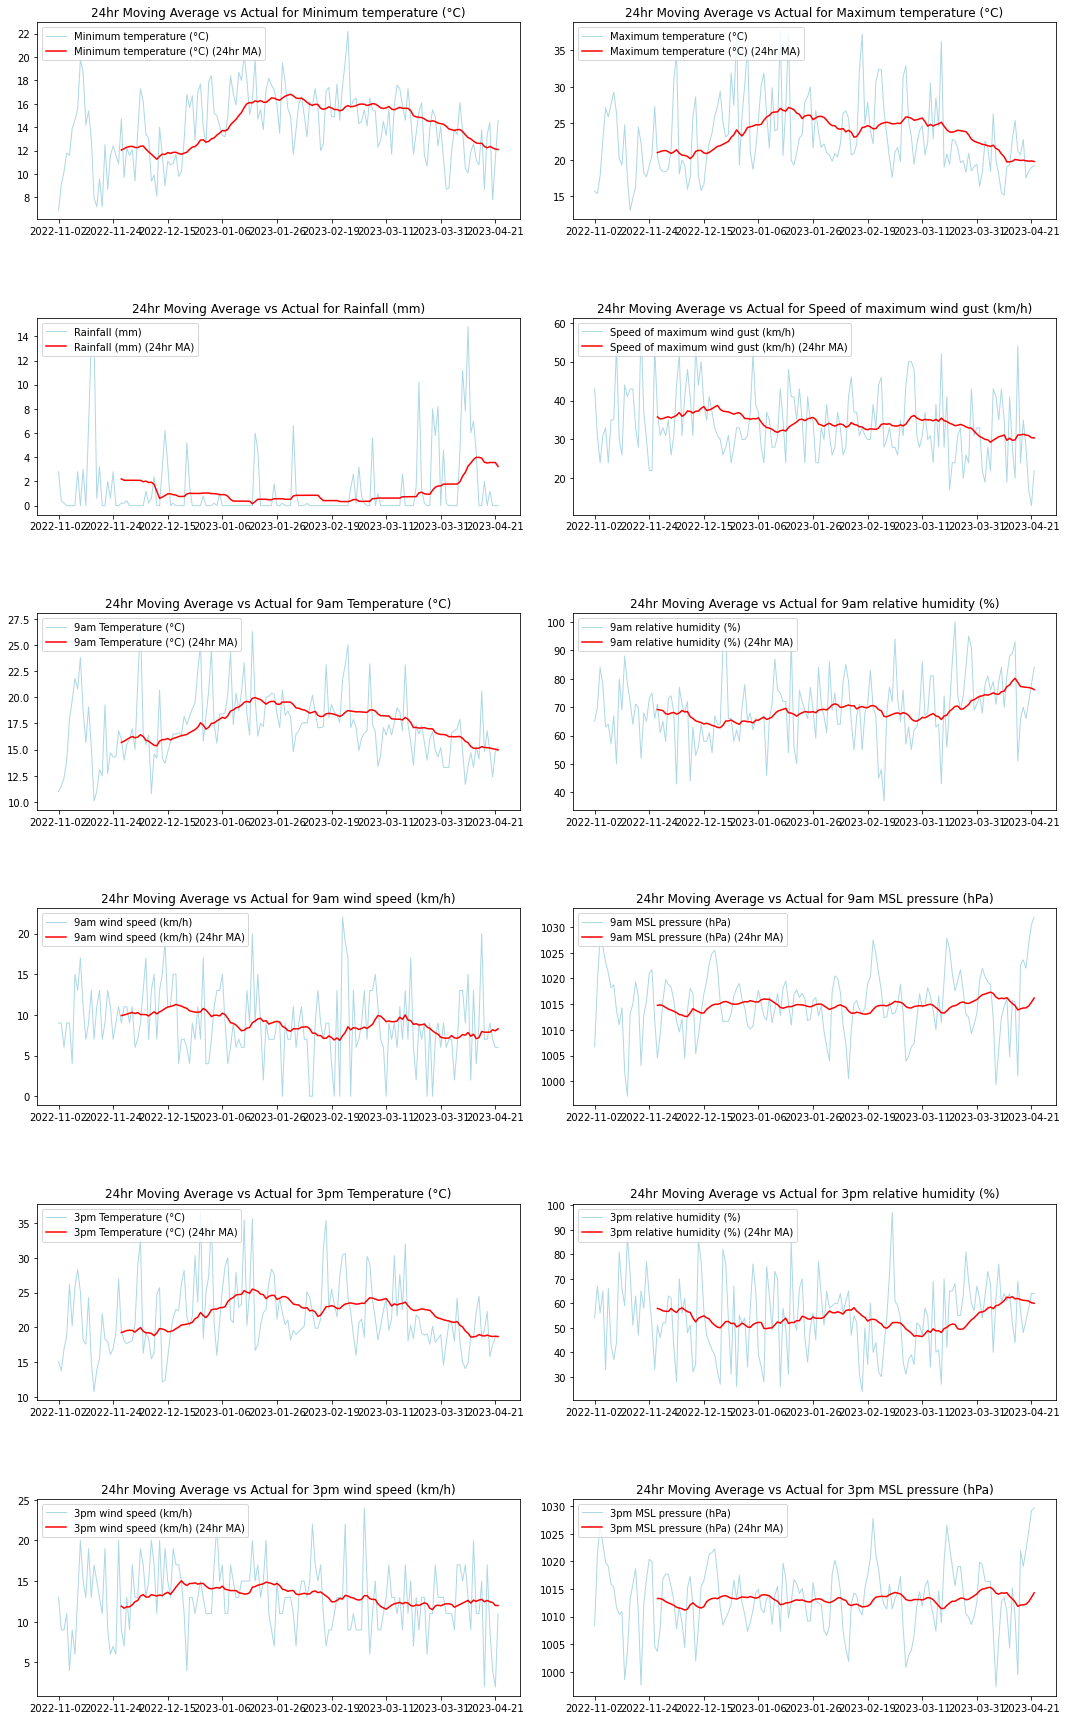

In [83]:
import matplotlib.pyplot as plt

# Columns for which the moving average needs to be calculated and plotted
columns_to_plot = [
    'Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
    'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
    '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
    '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)'
]

# Calculate and save the 24-hour moving average for each column in the weather_demand_df DataFrame
for col in columns_to_plot:
    weather_demand_df[col+'_MA_24'] = weather_demand_df[col].rolling(window=24).mean()

# Number of rows and columns for the facet plot
n_cols = 2
n_rows = len(columns_to_plot) // n_cols + len(columns_to_plot) % n_cols

# Create the updated facet grid of line plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

for ax, col in zip(axes.ravel(), columns_to_plot):
    weather_demand_df.plot(x='Date', y=col, ax=ax, label=col, color='lightblue', linewidth=1)
    moving_average_col = col + '_MA_24'
    ax.plot(weather_demand_df['Date'], weather_demand_df[moving_average_col], linestyle='-', color='red', label=col+' (24hr MA)', linewidth=1.5)
    ax.legend(loc='upper left')
    ax.set_title(f"24hr Moving Average vs Actual for {col}")
    ax.set_xlabel('')

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(hspace=0.5)
plt.show()

weather_demand_df.to_csv('moving_averages.csv', index=False)

## Scatter plot of Price and Demand ##

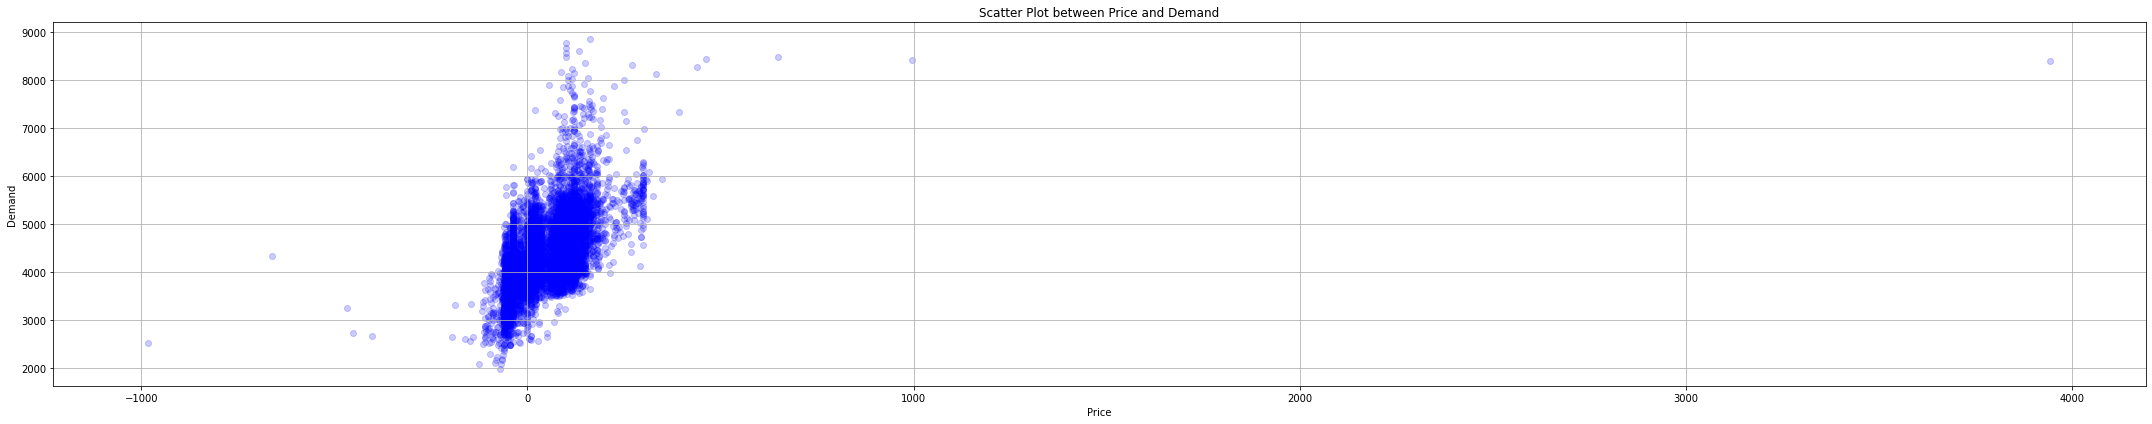

In [84]:
plt.figure(figsize=(30, 6))
plt.scatter(data_price_demand['Price'], data_price_demand['Demand (MW)'], color='blue', alpha=0.2)
plt.title('Scatter Plot between Price and Demand')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.grid(True)
plt.tight_layout()
plt.show()

## Histogram of Sample Demand (MW) with Descriptive Statistics ##

count    1000.000000
mean     5074.644000
std      2788.792611
min       104.000000
25%      2692.250000
50%      5224.000000
75%      7367.000000
max      9988.000000
Name: Sample Demand (MW), dtype: float64


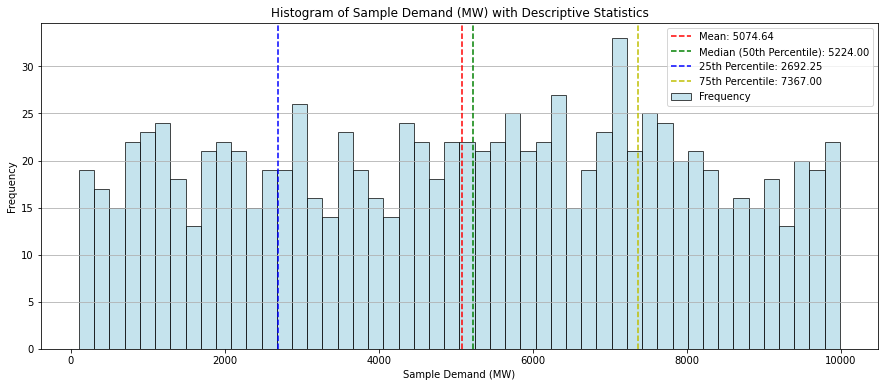

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data generation without overwriting weather_demand_df
np.random.seed(42)
sample_demand_data = np.random.randint(100, 10000, size=1000)
sample_df = pd.DataFrame(sample_demand_data, columns=['Sample Demand (MW)'])

# Calculate descriptive statistics for 'Sample Demand (MW)'
descriptive_stats_sample = sample_df['Sample Demand (MW)'].describe()

# Print the descriptive statistics
print(descriptive_stats_sample)

# Create a figure and axis object with an increased width and height
fig, ax1 = plt.subplots(figsize=(15, 6))  # Increased width to 15

# Plot histogram on the axis
ax1.hist(sample_df['Sample Demand (MW)'], bins=50, edgecolor='k', alpha=0.7, color='lightblue', label='Frequency')
ax1.axvline(x=descriptive_stats_sample['mean'], color='r', linestyle='--', label=f"Mean: {descriptive_stats_sample['mean']:.2f}")
ax1.axvline(x=descriptive_stats_sample['50%'], color='g', linestyle='--', label=f"Median (50th Percentile): {descriptive_stats_sample['50%']:.2f}")
ax1.axvline(x=descriptive_stats_sample['25%'], color='b', linestyle='--', label=f"25th Percentile: {descriptive_stats_sample['25%']:.2f}")
ax1.axvline(x=descriptive_stats_sample['75%'], color='y', linestyle='--', label=f"75th Percentile: {descriptive_stats_sample['75%']:.2f}")

# Set title, labels, and legend
ax1.set_title('Histogram of Sample Demand (MW) with Descriptive Statistics')
ax1.set_xlabel('Sample Demand (MW)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y')

# Display the plot
plt.show()

## Histogram of 24hr Moving Average Demand (MW) with Descriptive Statistics ##

count     139.000000
mean     4783.181097
std       260.126872
min      4092.712083
25%      4671.485000
50%      4791.577083
75%      4963.165833
max      5169.831667
Name: Demand_MA_24, dtype: float64


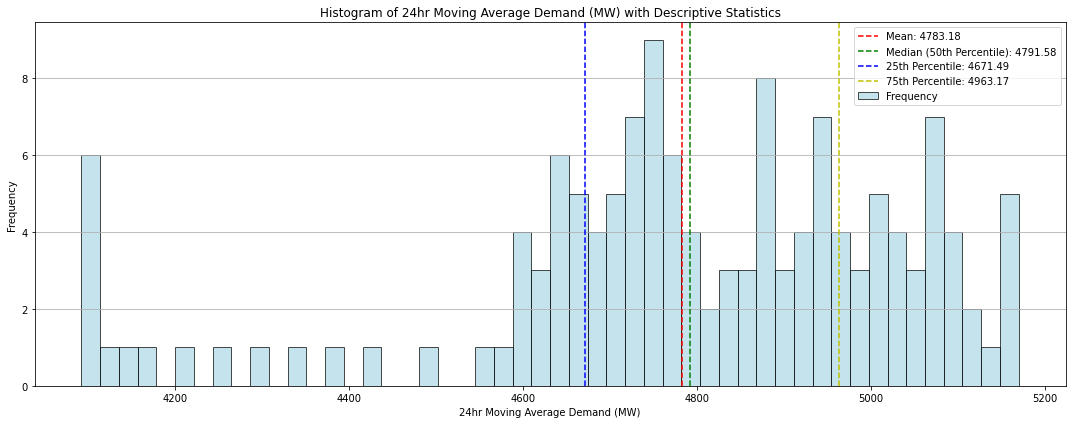

In [86]:
import matplotlib.pyplot as plt

# Compute the descriptive statistics
demand_ma_stats = moving_averages_df['Demand_MA_24'].describe()
print(demand_ma_stats)

# Create a figure and axis object with an increased width and height
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot histogram on the axis
ax1.hist(moving_averages_df['Demand_MA_24'].dropna(), bins=50, edgecolor='k', alpha=0.7, color='lightblue', label='Frequency')
ax1.axvline(x=demand_ma_stats['mean'], color='r', linestyle='--', label=f"Mean: {demand_ma_stats['mean']:.2f}")
ax1.axvline(x=demand_ma_stats['50%'], color='g', linestyle='--', label=f"Median (50th Percentile): {demand_ma_stats['50%']:.2f}")
ax1.axvline(x=demand_ma_stats['25%'], color='b', linestyle='--', label=f"25th Percentile: {demand_ma_stats['25%']:.2f}")
ax1.axvline(x=demand_ma_stats['75%'], color='y', linestyle='--', label=f"75th Percentile: {demand_ma_stats['75%']:.2f}")

# Set title, labels, and legend
ax1.set_title('Histogram of 24hr Moving Average Demand (MW) with Descriptive Statistics')
ax1.set_xlabel('24hr Moving Average Demand (MW)')
ax1.set_ylabel('Frequency')
ax1.legend()
ax1.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()

## Selecting Features using the Chi Square Test ##

In [87]:
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

# Binning the 'Demand' column for the updated DataFrame
weather_demand_df['Demand_bins'] = pd.cut(weather_demand_df['Demand (MW)'], bins=14, labels=False)

# List of all the columns to test
columns_to_test = ['Minimum temperature (°C)', 'Maximum temperature (°C)', 'Rainfall (mm)', 
                   'Speed of maximum wind gust (km/h)', '9am Temperature (°C)', '9am relative humidity (%)', 
                   '9am wind speed (km/h)', '9am MSL pressure (hPa)', '3pm Temperature (°C)', 
                   '3pm relative humidity (%)', '3pm wind speed (km/h)', '3pm MSL pressure (hPa)']

# Define significance level
alpha = 0.05

results = []

for column in columns_to_test:
    # Create a contingency table
    contingency_table = pd.crosstab(weather_demand_df[column], weather_demand_df['Demand_bins'])
    
    # Perform the Chi-Squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Check if all expected frequencies are >= 5
    valid_test = (expected >= 5).all()
    
    # CHECK FOR DEPENDENCE OF VARIABLES BY CHECKING AGAINST CHI SQUARED NULL HYPOTHESIS
    # Determine if the variable is dependent on 'Demand' based on p-value and significance level
    is_dependent = p < alpha
    
    # Append results
    results.append((column, p, valid_test, is_dependent))

# Create a DataFrame from the results
results_df = pd.DataFrame(results, columns=['Variable', 'p-value', 'Valid Test (Expected Frequencies >= 5)', 'Dependent on Demand'])

# RANKS WITH CHI SQUARED TEST
# Sort the DataFrame in ascending order by the p-value
results_df = results_df.sort_values(by='p-value')

# Display the DataFrame
results_df

,Variable,p-value,Valid Test (Expected Frequencies >= 5),Dependent on Demand
6,9am wind speed (km/h),2.094122e-11,False,True
9,3pm relative humidity (%),9.216867e-10,False,True
5,9am relative humidity (%),4.876913e-04,False,True
8,3pm Temperature (°C),1.908584e-02,False,True
10,3pm wind speed (km/h),3.047641e-02,False,True
4,9am Temperature (°C),5.161392e-02,False,False
1,Maximum temperature (°C),6.442269e-02,False,False
3,Speed of maximum wind gust (km/h),1.248282e-01,False,False
11,3pm MSL pressure (hPa),1.739709e-01,False,False
0,Minimum temperature (°C),2.425818e-01,False,False


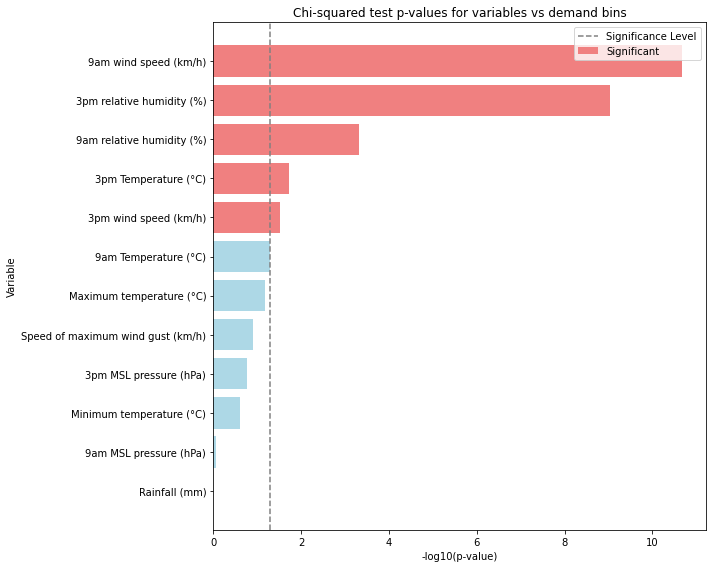

In [88]:
# Convert p-values to -log10 values
results_df['-log10(p-value)'] = -np.log10(results_df['p-value'])

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Color bars based on significance level, but change the "Not Significant" color to light blue
colors = ['lightcoral' if p < alpha else 'lightblue' for p in results_df['p-value']]

# Create a bar plot of -log10 p-values
ax.barh(results_df['Variable'], results_df['-log10(p-value)'], color=colors)

# Add a vertical line to indicate the significance level at -log10(alpha)
ax.axvline(x=-np.log10(alpha), linestyle='--', color='gray')

# Set labels and title
ax.set_xlabel('-log10(p-value)')
ax.set_ylabel('Variable')
ax.set_title('Chi-squared test p-values for variables vs demand bins')
ax.legend(['Significance Level', 'Significant', 'Not Significant'], loc='upper right')

# Invert y-axis to have the largest -log10 p-values at the top
ax.invert_yaxis()

plt.tight_layout()
plt.show()